<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/Futebol_com_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret -q

In [2]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd

In [4]:
df = pd.read_excel("resultados.xlsx")

In [5]:
data = df.drop(columns=['Confronto', 'Data_new', 'Time', 'Time_Fora','N_Gols'])

In [6]:
test = data.sample(frac=0.30)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [7]:
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [8]:
clf = setup(data=train, target='Result')

,Description,Value
0,session_id,3523
1,Target,Result
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(266, 37)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
clf = setup(data = data,
            target = 'Result',
            normalize = True,
            transformation = True, 
            ignore_low_variance = True,
            # remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            log_experiment = True,
            experiment_name = 'football_results_01')

,Description,Value
0,session_id,791
1,Target,Result
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(380, 37)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5023,0.6192,0.4430,0.4879,0.4809,0.1781,0.1832,0.536
dummy,Dummy Classifier,0.4869,0.5000,0.3333,0.2372,0.3190,0.0000,0.0000,0.016
rf,Random Forest Classifier,0.4762,0.5879,0.3827,0.4279,0.4127,0.0796,0.0808,0.504
et,Extra Trees Classifier,0.4644,0.5759,0.3687,0.4115,0.3998,0.0600,0.0701,0.462
ridge,Ridge Classifier,0.4608,0.0000,0.3942,0.4566,0.4372,0.1051,0.1105,0.013
lda,Linear Discriminant Analysis,0.4608,0.5880,0.4058,0.4584,0.4478,0.1242,0.1270,0.017
knn,K Neighbors Classifier,0.4561,0.5753,0.3579,0.3680,0.3950,0.0547,0.0601,0.118
gbc,Gradient Boosting Classifier,0.4534,0.5578,0.3937,0.4254,0.4254,0.0835,0.0854,0.526
lightgbm,Light Gradient Boosting Machine,0.4494,0.5361,0.3804,0.4214,0.4180,0.0815,0.0853,0.128
svm,SVM - Linear Kernel,0.4383,0.0000,0.3902,0.4456,0.4328,0.0945,0.0934,0.063


In [11]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=791, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [12]:
rf = create_model('rf')
print(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4074,0.4382,0.2821,0.2303,0.2942,-0.0746,-0.1013
1,0.3333,0.5116,0.2308,0.2167,0.2626,-0.1571,-0.1761
2,0.6296,0.7044,0.5678,0.7148,0.5799,0.3836,0.4131
3,0.3704,0.4762,0.3004,0.3346,0.3438,-0.0479,-0.0496
4,0.4444,0.5745,0.3297,0.3071,0.3381,-0.0227,-0.0349
5,0.6154,0.7410,0.5360,0.6229,0.5940,0.3333,0.3538
6,0.4615,0.5805,0.3516,0.3846,0.4009,0.0319,0.0365
7,0.4615,0.6434,0.3297,0.3737,0.3654,-0.0196,-0.0286
8,0.5769,0.6617,0.5263,0.5377,0.5410,0.2814,0.2948


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=791, verbose=0,
                       warm_start=False)


In [13]:
tuned_rf = tune_model(rf, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4444,0.4947,0.3077,0.2407,0.3123,-0.0227,-0.0344
1,0.3704,0.4815,0.2784,0.2618,0.2948,-0.1250,-0.1571
2,0.5926,0.6640,0.5201,0.5812,0.5482,0.3028,0.3314
3,0.5185,0.4622,0.4029,0.4240,0.4247,0.1269,0.1721
4,0.4815,0.6185,0.3553,0.3607,0.3617,0.0308,0.0558
5,0.6538,0.7485,0.5317,0.7173,0.5945,0.3760,0.4341
6,0.5000,0.5553,0.3993,0.4247,0.4471,0.1152,0.1267
7,0.5385,0.6663,0.4029,0.4073,0.4408,0.1381,0.1835
8,0.6154,0.6880,0.5220,0.6511,0.5666,0.2992,0.3627


In [14]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.01, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=791, verbose=0,
                       warm_start=False)


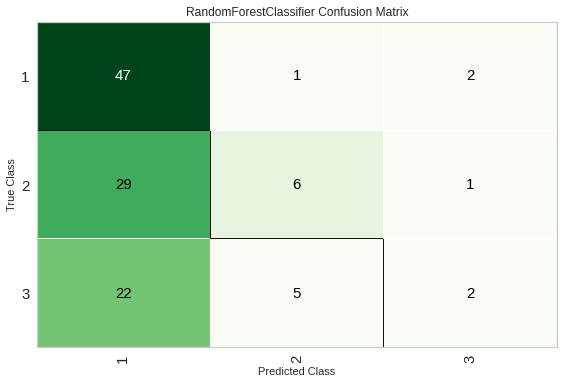

In [15]:
plot_model(tuned_rf, plot='confusion_matrix')

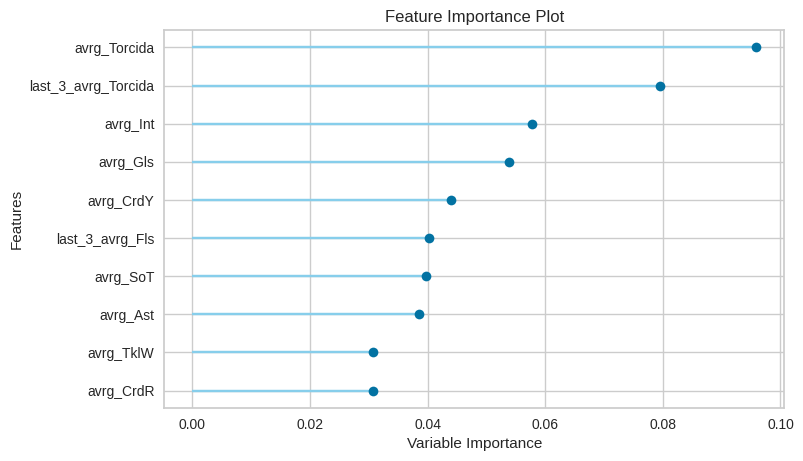

In [16]:
plot_model(tuned_rf, plot='feature')

In [17]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
# predict_model(tuned_rf);

In [19]:
predictions = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4783,0.6092,0.3919,0.4659,0.3841,0.1094,0.1557


IndexError: ignored

In [ ]:
predictions.head()

In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
# test_preds = predict_model(final_rf, data=test)
save_model(final_rf,'Modelo_Final_Futebol_2022_04_04')

In [ ]:
# carregando um modelo salvo
saved_final_gbr = load_model('Modelo_Final_Futebol_2022_04_04')